## Detrended Fluctuation Analysis

Detrended fluctuation analysis (DFA) is used to uncover the degree of self-similarity within a time series. In brief, it estimates the self-similarity within a time series by calculating the average magnitude of variance across a range of window sizes (e.g., 8, 16, 32 etc. samples), and then plots these variance magnitude measures as a function of window size on a log-log plot. The slope of best fit, 𝛼, can then be used as an estimate of self-similarity. DFA is specifically designed to analyze monofractal signals, including fractional Gaussian noise (fGn; a stationary series of fluctuations) and fractional Brownian motion (fBm; a non-stationary series of fluctuations). 

#### Interpreting Alpha (𝛼)
DFA returns alpha as an index of self-similarity. Here, 𝛼 ≈ 0.5 indicates random, uncorrelated variation (“white noise”), 𝛼 ≈ 1.0 indicates fractal, power law scaling (“pink noise”), and 𝛼 ≈ 1.5 indicates highly persistent and correlated patterns of Brownian motion (“brown noise”).

#### Let's Practice Running DFA
Before we begin, we need to import and load various packages and utilities. These will allow us to import the data, manipulate it, run DFA, and create visualisations to explore our results.

The code below will do all the setup for you. Simply click the "play" button on the left to run the code, and we'll be ready to start our analysis.



In [1]:
import os
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output
from utils import filter_data, interpolate_missing_data
from utils.dfa_utils import perform_dfa, perform_dfa_for_plotting, perform_nolds_dfa
from utils.plot_utils import plot_ts_and_dfa

C:\Users\MQ20188409\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pytools\persistent_dict.py:59: UserWarning: Unable to import recommended hash 'siphash24.siphash13', falling back to 'hashlib.sha256'. Run 'python3 -m pip install siphash24' to install the recommended hash.
  warn("Unable to import recommended hash 'siphash24.siphash13', "


Now that all the utilities are loaded, it's time to apply DFA to some real data — in this case, [heart rate variability data](data/dfa/hrv_data.txt).

Just click the "play" button below to perform the analysis and generate the visualisations.

Loading file: hrv_data.txt
Alpha value for column 0: 1.0592939143916251


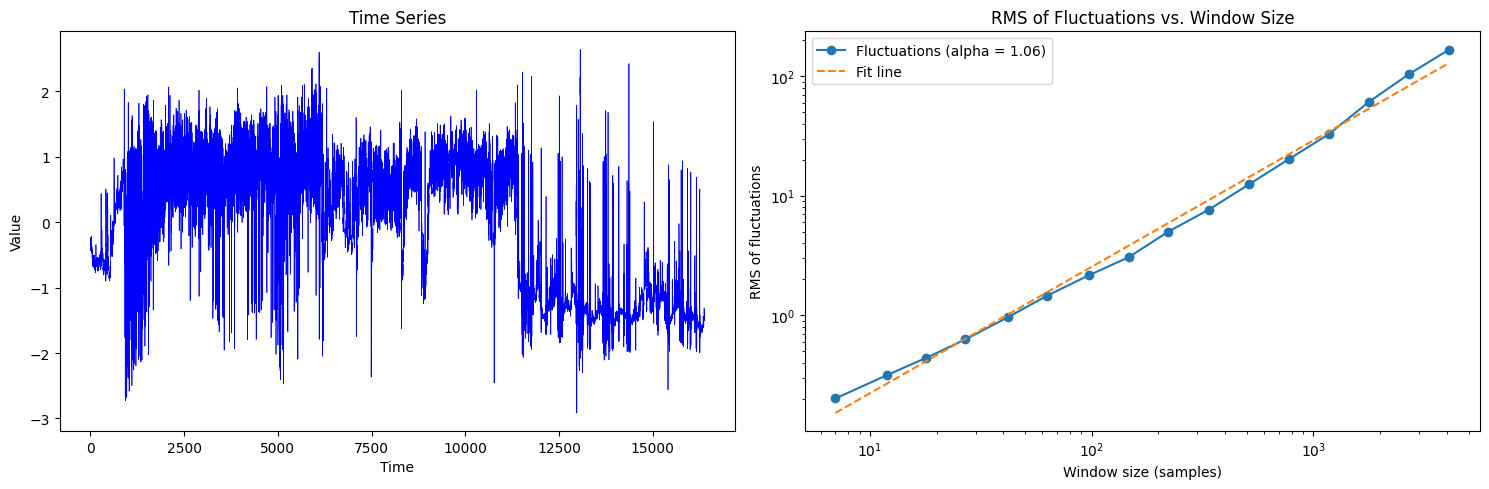

DFA analysis and plotting completed successfully!


In [2]:
# First set the directory path for the data
data_directory = "data/dfa/"

# Then decide whether you'd like to save the plots 
# These are saved in "images/rqa"
save_image = True

# Set the file name for the data
file_name = "hrv_data.txt"
file_path = os.path.join(data_directory, file_name)

# Check whether the file containing the data exists
if os.path.exists(file_path):
    print(f'Loading file: {file_name}')

    # Load the CSV file into a DataFrame
    data = pd.read_csv(file_path, header=None, sep='\t')

    # Interpolate any missing data that might be present in the file
    data = interpolate_missing_data(data)

    # Apply a filter to the data
    data = filter_data(data)
    
    # Normalise the data by using a z-score
    data = (data - data.mean()) / data.std()

    # Perform DFA analysis using the perform_dfa_for_plotting function from dfa_utils
    dfa_results = perform_dfa_for_plotting(data)

    # Plot time series and DFA results side-by-side
    for column, results in dfa_results.items():
        print(f'Alpha value for column {column}: {results["alpha"]}')
        alpha = results['alpha']
        scales = results['scales']
        flucts = results['flucts']
        fit_line = results['fit_line']

        # Plotting code (assuming a plot function is available)
        plot_filename = f'images/dfa/{file_name}_dfa_{column}_plot.png'
        plot_ts_and_dfa(data[column].values, scales, flucts, fit_line, alpha, save_image, plot_filename)

    print('DFA analysis and plotting completed successfully!')
else:
    print(f'File {file_name} not found in directory {data_directory}')

#### Interpreting the Results

If your code ran successfully, you should see an alpha value of 1.06. This indicates fractal, power law scaling (“pink noise”).

Now let's see how this metrics compare to a different person's heart rate variability. Click "play" on the code chunk before to run DFA on another HRV signal, and observe the differences.

In [ ]:
# add second signal

#### Comparing the Results

If you examine the plots and the resulting alpha, you'll notice that the second HRV signal is MORE/LESS persistent than the first.

#### Going Further

To expand your understanding of DFA, you can try the following:

1. Analyse other time series: Repeat the analyses above with other types of continuous data such as [walking](data/dfa/Gait1.txt).
2. Run a windowed DFA: To assess how patterns of behavioural variability change over time, explore [dfaWindowed.ipynb](dfaWindowed.ipynb) which walks you through performing windowed DFA.
3. Explore complexity matching: Fractal scaling in human behavioural time series has been shown to algin with an interaction partner. Explore different ways to quantify complexity matching by heading to [complexitymatching.ipynb](complexitymatching.ipynb).